<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progress Report #2: Regression  
**Course**: Introduction to Data Science  
**Team Members**:  
- Theresa Katele (tkatele@angelo.edu)  
- Aicha Ndir (andir@angelo.edu)  
- Seoyoung Jung (sysilove1526@gmail.com)  

**Date** : 11-07-2024

## Dataset Overview  
This dataset contains detailed metadata for a variety of TV shows. The data was sourced from TMDB and includes information about popularity, ratings, and user engagement metrics.  

**Key Features**:  
- **Numerical Features**:  
  - `popularity`: A numerical measure reflecting the show's popularity.  
  - `vote_average`: The average user rating on a numeric scale.  
  - `vote_count`: Total number of user votes or ratings.  

- **Categorical Features**:  
  - `name`: Title of the TV show.  
  - `first_air_date`: The release date of the show (can be transformed into release year for analysis).  
  - `overview`: A textual summary of the show's plot.  

This dataset is used to explore trends and predict success factors for TV shows, such as popularity and audience engagement, using regression, classification, and clustering techniques. For easy understanding, we will keep the name "movies" throughout the analysis, even though they are really TV Shows.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/movies.csv'
data = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## (1) Linear Regression with Two Attributes
We aim to predict the `popularity` of a movie using its `vote_average`. We'll use simple linear regression for this purpose, using their vote_average. The model will be evaluated using Mean Squared Error (MSE) and R^2
score, and the results will be visualized with a scatter plot comparing observed and predicted values.

Summary of predictor (vote_average):
        vote_average
count   4064.000000
mean       7.731904
std        0.569620
min        3.444000
25%        7.400000
50%        7.788500
75%        8.163250
max        8.913000

Summary of target (popularity):
 count    4064.000000
mean      267.041567
std       330.681938
min         5.505000
25%        87.634000
50%       162.610500
75%       308.924750
max      4025.682000
Name: popularity, dtype: float64
Training samples: 3251, Testing samples: 813
Model Coefficients: [-0.16140832]
Intercept: 269.6707397013622

Model Performance:
Mean Squared Error (MSE): 100452.65905466843
R^2 Score: -0.000504326431933988


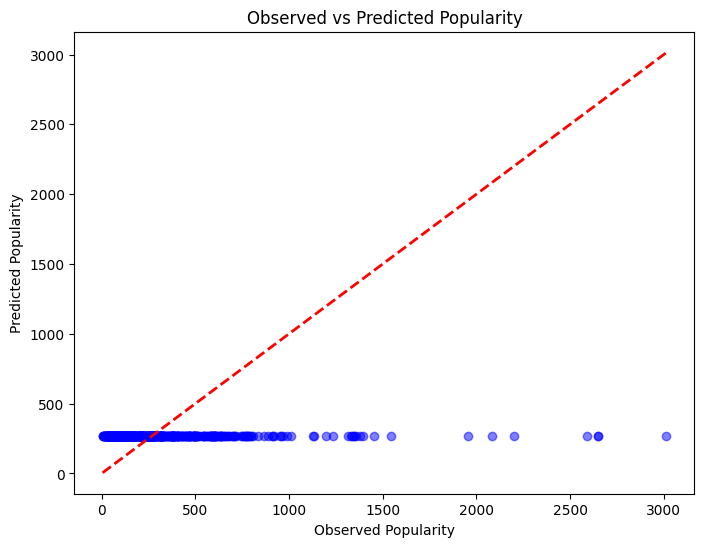

In [ ]:
# Select attributes
X = data[['vote_average']]  # Predictor: vote_average
y = data['popularity']      # Target variable: popularity

# Display summary statistics for the variables
print("Summary of predictor (vote_average):\n", X.describe())
print("\nSummary of target (popularity):\n", y.describe())

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Instantiate the LinearRegression model
model.fit(X_train, y_train)  # Train the model on the training data

# Display the model's coefficients and intercept
print("Model Coefficients:", model.coef_)  # Slope of the line
print("Intercept:", model.intercept_)     # Y-intercept of the line

# Predict using the test set
y_pred = model.predict(X_test)  # Generate predictions for the test data

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)            # Calculate R-squared score

# Print evaluation metrics
print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Visualize the observed vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  # Scatter plot for predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line y = x
plt.xlabel("Observed Popularity")  # X-axis label
plt.ylabel("Predicted Popularity")  # Y-axis label
plt.title("Observed vs Predicted Popularity")  # Plot title
plt.show()  # Display the plot


This simple linear regression model does not effectively predict popularity using vote_average. The weak and negative relationship suggests that vote_average alone is not a significant predictor of popularity. Additional features, such as vote_count or other factors, are likely needed to improve the model's performance.

## (2) Multiple Linear Regression
For this task, we will develop a multiple linear regression model using more than two attributes from the dataset. We'll predict popularity using vote_average and vote_count as predictors. The model's performance will be evaluated using Mean Squared Error (MSE) and R^2
 , and a 3D plot will be created using mpl_toolkits.mplot3d to visualize observed and predicted values.


Model Performance:
Mean Squared Error (MSE): 0.7926784902652968
R^2 Score: 0.07841241136940158


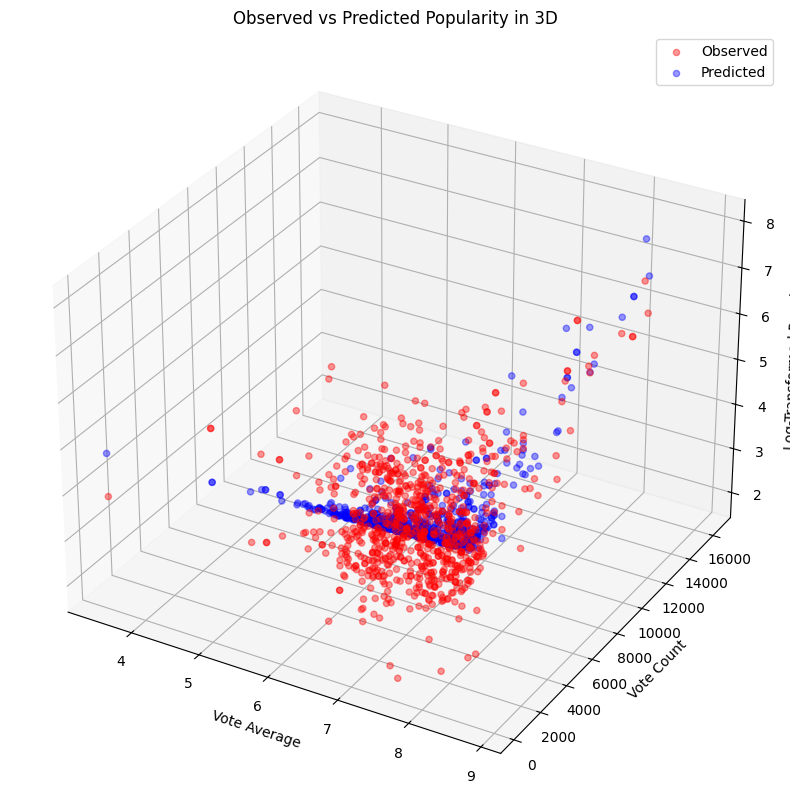

In [ ]:
# Step 1: Select multiple attributes
# Features: vote_average and vote_count
X = data[['vote_average', 'vote_count']]
# Target variable: popularity
y = data['popularity']

# Log-transform the target variable to reduce skewness
y_log = np.log1p(y)  # log(1 + y) ensures we handle values close to zero

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 3: Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict using the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R^2 Score

# Display evaluation results
print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Step 5: Visualize the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with transparency
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_test, color='red', alpha=0.4, s=20, label='Observed')
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_pred, color='blue', alpha=0.4, s=20, label='Predicted')

# Add axis labels and title
ax.set_xlabel("Vote Average")
ax.set_ylabel("Vote Count")
ax.set_zlabel("Log-Transformed Popularity")
ax.set_title("Observed vs Predicted Popularity in 3D")
ax.legend()

plt.show()


###Model Performance

#####Mean Squared Error (MSE): 0.79 indicates that the model's predictions deviate moderately from the observed values after log transformation.

#####R^2 Score: 0.078 shows the model explains only 7.8% of the variance in popularity. This suggests a weak fit.
###Insights

#####The model captures basic trends but struggles to explain most of the variability in popularity.
#####vote_count likely contributes more to the predictions than vote_average, but additional factors are needed to improve the model.
###Next Steps

####Consider adding more predictors (e.g., genre or release year).
Explore non-linear models or interaction terms for better performance.

## (3) Logistic Regression Model
Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.

Class Weights: {0: 0.6732935719019219, 1: 1.94263862332696}

Model Performance:
Accuracy: 0.73
Confusion Matrix:
 [[503  96]
 [125  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       599
           1       0.48      0.42      0.45       214

    accuracy                           0.73       813
   macro avg       0.64      0.63      0.63       813
weighted avg       0.72      0.73      0.72       813



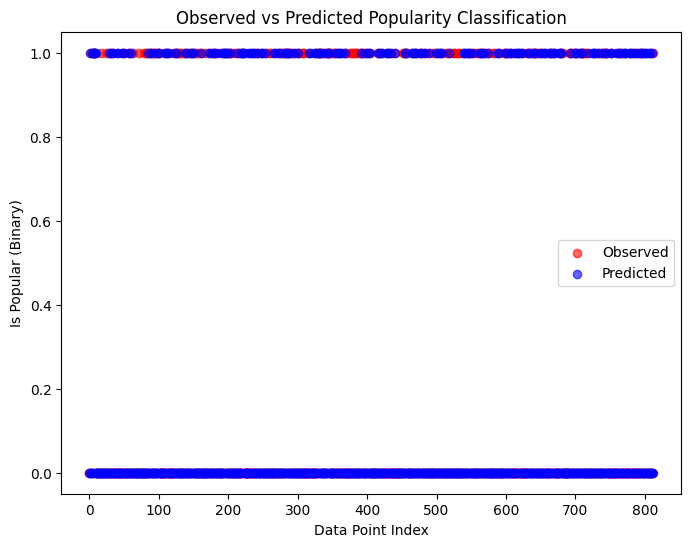

In [ ]:
# Step 1: Create a binary target variable
# Define a threshold for popularity (e.g., movies with popularity > 300 are "popular")
data['is_popular'] = (data['popularity'] > 300).astype(int)

# Features (predictors) and binary target
X = data[['vote_average', 'vote_count']]  # Independent variables
y = data['is_popular']                   # Binary target variable

# Step 2: Handle class imbalance using class weights
# Calculate class weights for the binary target
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weight_dict)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model with class weights
log_model = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)
log_model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict on the test set
y_pred = log_model.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 5: Visualize observed vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.6, color='red', label='Observed')
plt.scatter(range(len(y_test)), y_pred, alpha=0.6, color='blue', label='Predicted')
plt.xlabel("Data Point Index")
plt.ylabel("Is Popular (Binary)")
plt.title("Observed vs Predicted Popularity Classification")
plt.legend()
plt.show()


####Key Insights

#####The model is effective at classifying "not popular" movies, as shown by high precision and recall for Class 0.
While there is some success in identifying "popular" movies, further improvements are needed to reduce false negatives and better balance predictions for both classes.
Potential Improvements

#####Consider additional features (e.g., genre, release year) to enhance the model's ability to distinguish between "popular" and "not popular" movies.
Explore alternative models like Random Forest or Gradient Boosting for potentially better performance in complex patterns.
The results show the model's strengths in handling the majority class (Class 0) while identifying areas for further optimization in predicting the minority class (Class 1).

## Conclusion :
Key Insights Across All Tasks
####Feature Importance:
Adding `vote_count` as a feature significantly improved both linear and logistic regression models, demonstrating its importance in predicting or classifying popularity.
However, `vote_average` alone proved insufficient to explain or predict popularity.
####Target Variable Challenges:
The wide range and skewness of popularity posed challenges for both linear and logistic regression models.
Transforming the target variable (log transformation for linear regression, binary threshold for logistic regression) helped address these issues.
####Model Performance:
The linear regression models explained very little variance, indicating that popularity is influenced by factors beyond `vote_average` and `vote_count`.
The logistic regression model was effective at classifying "not popular" movies but required additional improvements to handle the minority class ("popular" movies).
####Visualization:
Observed vs. predicted scatter plots and 3D visualizations helped identify where the models aligned well and where they struggled (e.g., outliers, minority class misclassification).

### final takeaway:
The analyses demonstrate that while basic regression models can capture some trends, they struggle with outliers, skewed distributions, and class imbalances. Improvements in feature engineering, model selection, and handling imbalanced data will be crucial for achieving more robust predictions and classifications.